# Sklearn - Treinando um modelo de classificação

- **FASE 1 - Preparando o dataset**

## 🎯 Objetivo

O modelo será treinado para prever a variável `categoria` (que pode ser `"A"` ou `"B"`) com base nas demais colunas do dataset, após todo o pré-processamento que fizemos.

Treinar um modelo de **Regressão Logística** usando:
- Dados já pré-processados (`df_final`)
- Divisão entre dados de treino e teste
- Métricas de avaliação

### 🐍 Código - Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

### 🔖 Explicações

| Biblioteca / Classe                    | Finalidade Principal                                      |
|---------------------------------------|------------------------------------------------------------|
| `train_test_split`                    | Dividir dados em conjuntos de treino e teste              |
| `LogisticRegression`                  | Treinar um modelo de classificação                        |
| `accuracy_score`                      | Medir a porcentagem de acertos do modelo                  |
| `classification_report`               | Relatório detalhado com precisão, recall e f1-score       |
| `confusion_matrix`                    | Visualizar os tipos de erros do modelo                    |

## Carregando o Dataset

### 🐍 Código

In [2]:
df = pd.read_csv('dataset/dataset_sudeste_simples_realista_outliers-2k.csv')
df.head()

,id,idade,renda,cidade,categoria,nota,feedback
0,1,39.0,5112.57,Belo Horizonte,A,4.5,Bom
1,2,64.0,9510.34,Belo Horizonte,B,5.4,Ruim
2,3,61.0,8970.80,São Paulo,B,5.0,Ruim
3,4,61.0,8526.52,Rio de Janeiro,A,1.8,Bom
4,5,53.0,3531.76,Vitória,B,5.5,Bom


### 🔖 Explicações

...

## Analisando o Dataset

### 🐍 Código

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      1982 non-null   float64
 2   renda      1983 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       1970 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


### 🔖 Explicações

...

### 🐍 Código

In [4]:
df.describe()

,id,idade,renda,nota
count,2000.000000,1982.000000,1983.000000,1970.000000
mean,1000.500000,43.570131,7204.110968,4.965228
std,577.494589,16.166064,3573.795505,2.940147
min,1.000000,1.000000,422.990000,-3.700000
25%,500.750000,30.000000,4189.235000,2.500000
50%,1000.500000,44.000000,7079.250000,5.000000
75%,1500.250000,57.000000,10111.805000,7.300000
max,2000.000000,118.000000,33739.810000,14.600000


### 🔖 Explicações

...

### 🐍 Código

In [5]:
df.isnull().sum()

id            0
idade        18
renda        17
cidade       12
categoria    21
nota         30
feedback     25
dtype: int64

### 🐍 Código

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   idade      2000 non-null   float64
 2   renda      2000 non-null   float64
 3   cidade     1988 non-null   object 
 4   categoria  1979 non-null   object 
 5   nota       2000 non-null   float64
 6   feedback   1975 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.5+ KB


## Ajustando o Dataset

### Imputando Valores (variáveis quantitatias)

### 🐍 Código - Idade e Nota

In [6]:
imputer_media = SimpleImputer(strategy='mean')
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

### 🐍 Código - Renda

In [7]:
imputer_mediana = SimpleImputer(strategy='median')
df[['renda']] = imputer_mediana.fit_transform(df[['renda']])

### 🐍 Código - Reverificando o Dataset

In [8]:
df.isnull().sum()

id            0
idade         0
renda         0
cidade       12
categoria    21
nota          0
feedback     25
dtype: int64

### 🔖 Explicações

- Neste ponto conseguimos remover os valores ausentes dos campos `idade`, `renda` e `nota`. 
- O processo utilizado foi a imputação de valores.

### Tratando os  Outliers de Idade

### 🐍 Código -  Identificando os Outliers de Idade

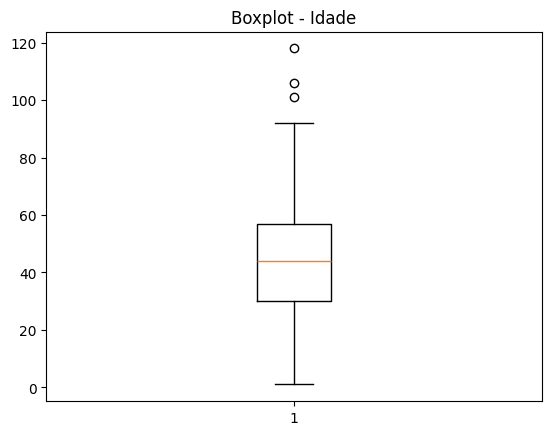

In [9]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

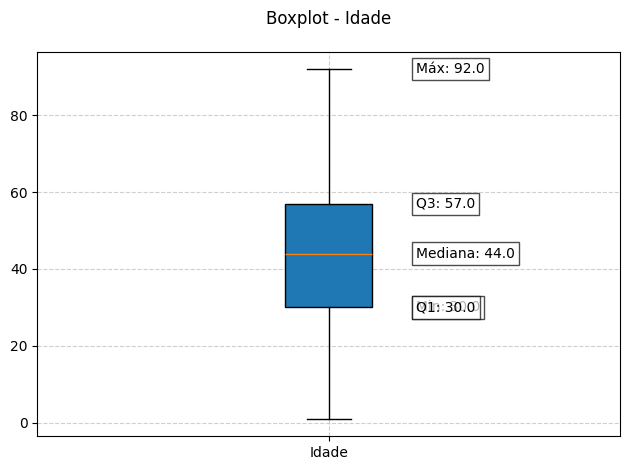

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Criar o boxplot e armazenar os dados retornados
bp = plt.boxplot(df['idade'], patch_artist=True, showfliers=False)

# 2. Extrair os valores estatísticos de forma compatível
# Obter os valores diretamente do cálculo do boxplot
stats = [item.get_ydata()[0] for item in bp['medians']]
median = stats[0]

# Para caixas e bigodes, precisamos acessar as coordenadas do Path
box = bp['boxes'][0]
box_path = box.get_path()
box_coords = box_path.vertices
q1 = np.min(box_coords[:, 1])
q3 = np.max(box_coords[:, 1])

whiskers = bp['whiskers']
min_valor = whiskers[0].get_ydata()[0]
max_valor = whiskers[1].get_ydata()[1]

# 3. Exibir os valores ao lado do boxplot
offset = 1.15  # Posição x do texto
props = {'verticalalignment': 'center', 'fontsize': 10, 
         'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 3}}

plt.text(offset, min_valor, f'Min: {min_valor:.1f}', **props)
plt.text(offset, q1, f'Q1: {q1:.1f}', **props)
plt.text(offset, median, f'Mediana: {median:.1f}', **props)
plt.text(offset, q3, f'Q3: {q3:.1f}', **props)
plt.text(offset, max_valor, f'Máx: {max_valor:.1f}', **props)

# 4. Ajustes finais do gráfico
plt.title("Boxplot - Idade", pad=20)
plt.xticks([1], ['Idade'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0.5, 1.5)
plt.tight_layout()

plt.show()

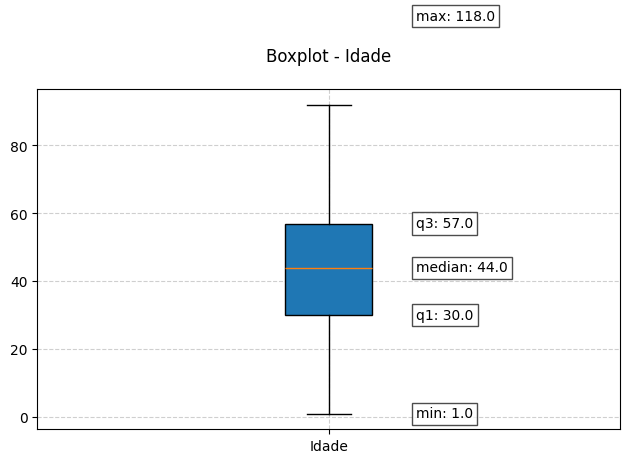

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular estatísticas manualmente
data = df['idade'].dropna()
stats = {
    'min': np.min(data),
    'q1': np.percentile(data, 25),
    'median': np.median(data),
    'q3': np.percentile(data, 75),
    'max': np.max(data)
}

# Criar boxplot
bp = plt.boxplot(data, patch_artist=True, showfliers=False)

# Adicionar textos
offset = 1.15
props = {'verticalalignment': 'center', 'fontsize': 10, 
         'bbox': {'facecolor': 'white', 'alpha': 0.7, 'pad': 3}}

for name, value in stats.items():
    plt.text(offset, value, f'{name}: {value:.1f}', **props)

# Formatação
plt.title("Boxplot - Idade", pad=20)
plt.xticks([1], ['Idade'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 🔖 Explicações

...

### 🐍 Código - Identificando os Outliers - IQR

In [13]:
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


print(f"\n\nVariavel: IDADE\n")
print (f"\t1o. Quartil     : {Q1}")
print (f"\t3o. Quartil     : {Q3}")
print (f"\tIQR             : {IQR}")
print (f"\tLimite Inferior : {limite_inferior}")
print (f"\tLimite Inferior : {limite_superior}")




Variavel: IDADE

	1o. Quartil     : 30.0
	3o. Quartil     : 57.0
	IQR             : 27.0
	Limite Inferior : -10.5
	Limite Inferior : 97.5


### 🐍 Código - Removendo os Outliers do campo Idade

In [15]:
df = df[(df['idade'] >= limite_inferior) & (df['idade'] <= limite_superior)]

### 🐍 Código - Verificando o DataSet

In [16]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1997 non-null   int64  
 1   idade      1997 non-null   float64
 2   renda      1997 non-null   float64
 3   cidade     1985 non-null   object 
 4   categoria  1976 non-null   object 
 5   nota       1997 non-null   float64
 6   feedback   1972 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.8+ KB


#### 🐍 Código - Removendo os Outliers de Renda

In [23]:
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


print(f"\n\nVariavel: Renda\n")
print (f"\t1o. Quartil     : {Q1}")
print (f"\t3o. Quartil     : {Q3}")
print (f"\tIQR             : {IQR}")
print (f"\tLimite Inferior : {limite_inferior}")
print (f"\tLimite Inferior : {limite_superior}")

df = df[(df['renda'] >= limite_inferior) & (df['renda'] <= limite_superior)]

print (f"\n\t Qt de linhas do Dataset \n")
df.info()




Variavel: Renda

	1o. Quartil     : 4259.8099999999995
	3o. Quartil     : 10049.1875
	IQR             : 5789.3775000000005
	Limite Inferior : -4424.25625
	Limite Inferior : 18733.25375

	 Qt de linhas do Dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1992 non-null   int64  
 1   idade      1992 non-null   float64
 2   renda      1992 non-null   float64
 3   cidade     1980 non-null   object 
 4   categoria  1971 non-null   object 
 5   nota       1992 non-null   float64
 6   feedback   1967 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.5+ KB


#### 🐍 Código - Removendo os Outliers de Nota

In [24]:
Q1 = df['nota'].quantile(0.25)
Q3 = df['nota'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


print(f"\n\nVariavel: Nota\n")
print (f"\t1o. Quartil     : {Q1}")
print (f"\t3o. Quartil     : {Q3}")
print (f"\tIQR             : {IQR}")
print (f"\tLimite Inferior : {limite_inferior}")
print (f"\tLimite Inferior : {limite_superior}")

df = df[(df['nota'] >= limite_inferior) & (df['nota'] <= limite_superior)]

print (f"\n\t Qt de linhas do Dataset \n")
df.info()



Variavel: Nota

	1o. Quartil     : 2.5
	3o. Quartil     : 7.3
	IQR             : 4.8
	Limite Inferior : -4.699999999999999
	Limite Inferior : 14.5

	 Qt de linhas do Dataset 

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1991 non-null   int64  
 1   idade      1991 non-null   float64
 2   renda      1991 non-null   float64
 3   cidade     1979 non-null   object 
 4   categoria  1970 non-null   object 
 5   nota       1991 non-null   float64
 6   feedback   1966 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 124.4+ KB


### 🐍 Código

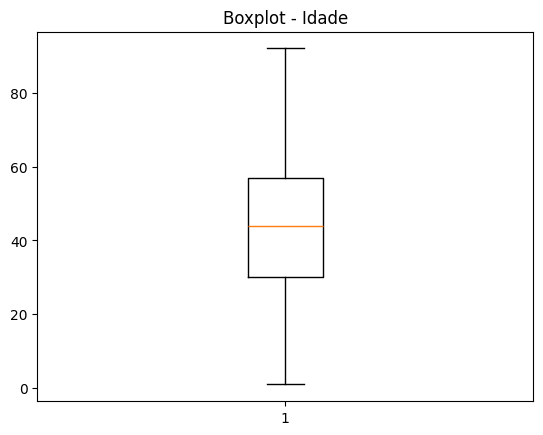

In [18]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

### 🐍 Código - Normalizar ou Padronizar Dados Numéricos

In [31]:
scaler = StandardScaler()
df[['idade_scaler', 'renda_scaler', 'nota_scaler']] = scaler.fit_transform(df[['idade', 'renda', 'nota']])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1991 non-null   int64  
 1   idade                  1991 non-null   float64
 2   renda                  1991 non-null   float64
 3   cidade                 1979 non-null   object 
 4   categoria              1970 non-null   object 
 5   nota                   1991 non-null   float64
 6   feedback               1966 non-null   object 
 7   cidade_Belo Horizonte  1991 non-null   float64
 8   cidade_Rio de Janeiro  1991 non-null   float64
 9   cidade_São Paulo       1991 non-null   float64
 10  cidade_Vitória         1991 non-null   float64
 11  cidade_nan             1991 non-null   float64
 12  categoria_A            1991 non-null   float64
 13  categoria_B            1991 non-null   float64
 14  categoria_nan          1991 non-null   float64
 15  feed

In [32]:
df.isnull().sum()

id                        0
idade                     0
renda                     0
cidade                   12
categoria                21
nota                      0
feedback                 25
cidade_Belo Horizonte     0
cidade_Rio de Janeiro     0
cidade_São Paulo          0
cidade_Vitória            0
cidade_nan                0
categoria_A               0
categoria_B               0
categoria_nan             0
feedback_Bom              0
feedback_Regular          0
feedback_Ruim             0
feedback_nan              0
idade_scaler              0
renda_scaler              0
nota_scaler               0
dtype: int64

### Transformar Variáveis Categóricas
- Opção 1: One-Hot Encoding (para variáveis nominais)

### 🐍 Código - Transformar Variáveis Categóricas

In [25]:
#encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' evita multicolinearidade
encoder = OneHotEncoder(sparse_output=False)

categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])
#categorias_codificadas = encoder.fit_transform(df[['cidade', 'feedback']])

# Converter para DataFrame
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))
#df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'feedback']))

# Concatenar com o DataFrame original
#df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)
df = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

##
# Não removeremos as colunas originais neste momento
##
# Remover as colunas originais categóricas
#df_final.drop(['cidade', 'categoria', 'feedback'], axis=1, inplace=True)
#df_final.drop(['cidade', 'feedback'], axis=1, inplace=True)

### 🐍 Código Revisando o dataset

In [36]:
print(df.isnull().sum())
print (f"\n\n")
#print(df.head(10))
#print (f"\n\n")
#print(df.describe())

id                        0
idade                     0
renda                     0
cidade                   12
categoria                21
nota                      0
feedback                 25
cidade_Belo Horizonte     0
cidade_Rio de Janeiro     0
cidade_São Paulo          0
cidade_Vitória            0
cidade_nan                0
categoria_A               0
categoria_B               0
categoria_nan             0
feedback_Bom              0
feedback_Regular          0
feedback_Ruim             0
feedback_nan              0
idade_scaler              0
renda_scaler              0
nota_scaler               0
dtype: int64





## 🔖 Salvando o Dataset

In [37]:
df.to_csv('./dataset-fase1/dataset_sudeste_simples_realista_outliers-2k-fase1.csv.gz', compression='gzip', index=False)
df.to_csv('./dataset-fase1/dataset_sudeste_simples_realista_outliers-2k-fase1.csv', index=False)